
### <u>Expedia Explorations: A Machine Learning Approach to Hotel Recommendation Systems</u>


____________________________________________________________________________________________________________________


#### || `Project Members` || : <br>
<b>Yinbo Hu</b> (<u>yh3184</u>) · <b>Junyi Yao</b> (<u>jy3178</u>) · <b>Karen Jan</b> (<u>kj2546</u>) · <b>Rishav Agarwal</b> (<u>ra3141</u>) · <b>Austin Lee</b> (<u>aal2194</u>)

#### || `Assignment Dates` || : <br>
<b>Proposal Deadline</b> (<u>02/21/2022</u>) · <b>Presentation Deadline</b> (<u>03/21/2022</u>) · <b>Report & Code Deadline</b> (<u>04/25/2022</u>)

____________________________________________________________________________________________________________________


#### || `Target Goals & Applications` || : <br>

<b>1. Target Goal (<u>Hotel Clusters</u>):</b> <br><br>Predict up to 5 hotel clusters users are most likely to belong to. Hotel clusters will be assigned as the multi-class classification target variable using other adjacent feature combinations as input variables. The hotel cluster type users belong to will be the recommended accommodations predicted for the user. Train, test, interpret, and determine the best model, hyperparameters, and feature selections that fits this goal. This multiclass output variable is stored in 'hotel_clusters', signifying recommendable hotel groups.

<b>2. Target Goal (<u>Booking Outcomes</u>):</b> <br><br>Predict whether a user will book (1) or not (0), based off feature sets available. Hotel cluster can also be used or negated for training and test iterations. Train, test, interpret, and determine the best model, hyperparameters, and feature selections that fits this goal. This binary output variable is stored in 'is_booking', signifying booking decision outcomes per user.


#### || `Prerequisite Notes` || : <br>

Hotel cluster types are predetermined by an internal algorithm from Expedia. This algortihm is not shared to external contributors towards project submissions. Feature importances for this hidden method can be further explored and estimated through modeling and feature engineering methods executed in later post-modeling steps, if time permits.


### <u>Step [0] : Import Prerequisite Packages & Modules. Define File Directory Locations & Nomenclatures.</u>


#### `Part A.` Import all Prerequisite Packages & Modules.

In [14]:
###########################################################################################################################################################################################

# Import Pandas for data structure manipulations.
import pandas as pd

# Import NumPy for numerical analysis.
import numpy as np

# Import a timer.
import time

# Import the train_test_split, cross-validation, and grid search modules from Scikit-Learn.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Import the One-Hot Encoder, Target Encoder, StandardScaler for later categorical to numeric encoding.
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Import the column transformer that can be used for scaling purposes in later steps.
from sklearn.compose import make_column_transformer

# Import the pipeline module for step-wise transformations in later steps.
from sklearn.pipeline import make_pipeline

# Import the mean_squared_error module from Scikit-Learn as a quick error metric.
from sklearn.metrics import accuracy_score, make_scorer, mean_squared_error

# Import DecisionTreeClassifer and tree visualizatoin methods from Scikit-Learn.
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Use the experimental method in Scikit-Learn to enable HistGradientBoostingClassifier.
from sklearn.experimental import enable_hist_gradient_boosting

# Import the RandomForestClassifier, GradientBoostingClassifier, and HistGradientBoostingClassifier from Scikit-Learn.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

# Import the XGBoost module from Scikit-Learn. Be sure to 'brew install cmake' in CLI.
# Next, 'pip install xgboost' in CLI or do a '!pip install xgboost' in iPython. This makes XGBoost accessible.
!pip install xgboost
import xgboost as xgb

# Import MatPlotLib for data exploration and visualizations.
import matplotlib.pyplot as plt

# Import Seaborn for data exploration and visualizations.
import seaborn as sns

# Set the grid style for Seaborn. I prefer darkgrid.
sns.set_style('darkgrid')

# Download MatPlotLib with a magic command to ensure it is present in script environment.
%matplotlib inline

# Ignore unnecessary warnings. This will clean up output appearances.
import warnings
warnings.filterwarnings('ignore')

###########################################################################################################################################################################################

#### `Part B.` Define File Directory Locations & Nomenclatures.

In [15]:
###########################################################################################################################################################################################

# Specify the name of the local 'data' directory data files will be stored.
data_folder = 'data/'

# Specify the data file extension .csv that training and test sets will be pulled from.
csv_extension = '.csv'

###########################################################################################################################################################################################

#### `Part C.` Access the Full Data Directory.

In [ ]:
###########################################################################################################################################################################################

# Grab the data files available in the local directory 'data'. 
# This folder is directly adjacent/parallel to this script file level in the directory.
# There should be three main sets - Training, test, and destination. The destination set is for supplemental merging.
! ls data/

###########################################################################################################################################################################################

### Step [1] : Initial Data Exploration. Read & Explore the Data.

#### `Exploration Checklist` :
- Determine the data type for each feature column (i.e. float, int, category/ordinal, datetime, etc.).
- Examine descriptive statistics and distributions of applicable numeric features (i.e. min, max, median, quantiles, etc.). Plot these distributions via boxplots.
- Test for colinear and multicolinear features. Remove the features where appropriate.
- Do a last check for NaN values. Ensure all have either been negated or imputed to ensure a complete dataframe with no null values.
- Plot the categorical cluster types to determine type distributions. 

#### `Part A.` Read the Training Data.

In [8]:
###########################################################################################################################################################################################

# Grab the training data available from the data directory.
train = pd.read_csv(data_folder + 'train' + csv_extension)

# Observe the first 5 items of the training set.
train.head(5)

###########################################################################################################################################################################################

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [70]:
###########################################################################################################################################################################################

# View the training set dimensions.
# There are 37,670,293 samples (i.e. user instances) and 24 features in the training set. 
print(f'\n\033[1mTraining Set Row Count:\033[0m {train.shape[0]}')
print(f'\n\033[1mTraining Set Feature Count:\033[0m {train.shape[1]}')

###########################################################################################################################################################################################


Training Set Row Count: 37670293

Training Set Feature Count: 24


#### `Part B.` Observe the Data Types of the Feature Selection in the Training Set.

#### `Training & Test Set Description` : 

<br>

![feature_dtypes_train_test](imgs/feature_dtypes_train_test.png)

[<b>Kaggle Source -</b> Linked Here](https://www.kaggle.com/c/expedia-hotel-recommendations/data?select=sample_submission.csv)

<br>

<b>`Data Exploration Notes from Karen` :</b>

All the features are either rendered as int or float. However, upon closer inspection they all appear to be a categorical feature. 

<b>The ones listed below are actual int, float, or datetime (not categorically oriented): </b><br><br>
    - orig_destination_distance <br>
    - date_time <br>
    - srch_ci <br>
    - srch_co <br>
    - srch_adults_cnt <br>
    - srch_children_cnt <br>
    - cnt
    
The other features aside from these select 7 are categorical in nature.

We need to consider how to encode these in some way. One-Hot vs. Target? I think we should encode these, because having srch_destination_id = 8250 is not inherently worse than having it = 14984. Also, should we consider scaling? Because, the ID values can get incredibly high. <br>

Based on what we defined as "insights from explorations" (some plots, relations, scaling", I'll leave this section to Yinbo and Junyi. Some (potentially) helpful things to plot: distribution of target variable (hotel_cluster) for each categorical var (maybe side-by-side bar plots?), maybe some sort of cluster plot? idk kinda just spitballing. Maybe take a look at hw1 for inspiration? <br><br>


<b>`Data Cleansing Notes from Austin & Rishav` :</b>

After converting the feature types to the correct data type designations (i.e. ensure the 7 listed features above are numeric and convert all other features to nominal categorical data types), we should One-Hot encode feature with lower unique types. 

For example, if a feature has 5 or under class types within it, we can just One-Hot encode. In contrast, if we see there are categoricals like destination types (via immense ID distributions), we can just target encode these values ensure the dimensionality of our dataframe doesn't expand too exponentially.

We can scale features that are actually numeric in nature (i.e. the 7 selected columns shown above). A basic z-scale (i.e. StandardScaler()) or minmax scale (i.e. MinMaxScaler()) method should be adequate for those use cases. Since ID designated columns are just representative of categorical types (and not true continuous values of interest), we'll encode these instead of scaling them. <br><br>


#### `Part C.` Examine the Descriptive Statistics of Training Set Features. Include Distributions and Visualizations.

In [108]:
###########################################################################################################################################################################################

# View the descriptive statistics for numeric feaures.

# Note that this is just a preliminary observation - Not all numeric features are actually continuous values.
# Some numeric features are actually categorical serial types used to define a region, area, destination, etc. 
# This is done by Expedia to obfuscate actual categorical/qualitative knowledge from proprietary data hidden from competitors.
# Internally, Expedia will know how to match these categorical serials back to actual names for destinations (etc.), once feature selections are derived by outcome.
train.describe()

###########################################################################################################################################################################################

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,2.414529e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,...,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07
mean,9.795271e+00,2.680473e+00,8.610880e+01,3.084060e+02,2.775304e+04,1.970090e+03,6.044518e+05,1.349265e-01,2.489042e-01,5.870761e+00,...,3.321222e-01,1.112663e+00,1.444109e+04,2.582280e+00,7.965675e-02,1.483384e+00,3.156305e+00,8.129685e+01,6.004619e+02,4.980861e+01
std,1.196754e+01,7.480393e-01,5.924310e+01,2.084437e+02,1.678255e+04,2.232442e+03,3.506175e+05,3.416451e-01,4.323782e-01,3.717095e+00,...,7.314981e-01,4.591155e-01,1.106630e+04,2.153019e+00,2.707611e-01,1.219776e+00,1.623189e+00,5.617119e+01,5.117391e+02,2.891595e+01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.000000e+00,6.600000e+01,1.740000e+02,1.300900e+04,3.131670e+02,2.989100e+05,0.000000e+00,0.000000e+00,2.000000e+00,...,0.000000e+00,1.000000e+00,8.267000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01,1.600000e+02,2.500000e+01
50%,2.000000e+00,3.000000e+00,6.600000e+01,3.140000e+02,2.765500e+04,1.140491e+03,6.039140e+05,0.000000e+00,0.000000e+00,9.000000e+00,...,0.000000e+00,1.000000e+00,9.147000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01,5.930000e+02,4.900000e+01
75%,1.400000e+01,3.000000e+00,7.000000e+01,3.850000e+02,4.241300e+04,2.552599e+03,9.101680e+05,0.000000e+00,0.000000e+00,9.000000e+00,...,0.000000e+00,1.000000e+00,1.879000e+04,5.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,1.060000e+02,7.010000e+02,7.300000e+01
max,5.300000e+01,4.000000e+00,2.390000e+02,1.027000e+03,5.650800e+04,1.240790e+04,1.198785e+06,1.000000e+00,1.000000e+00,1.000000e+01,...,9.000000e+00,8.000000e+00,6.510700e+04,9.000000e+00,1.000000e+00,2.690000e+02,6.000000e+00,2.120000e+02,2.117000e+03,9.900000e+01


In [258]:
###########################################################################################################################################################################################

# Insert visualizations below from applicable numeric features derived here.
# Note that we only want to view numeric distributions of true continuous variables ONLY:
# orig_destination_distance, date_time, srch_ci, srch_co, srch_adults_cnt, srch_children_cnt, cnt

# Use boxplots to show the descriptive statistics. There can be 7 preliminary visualizations. 
# For now, let's just stick to the orig_destination_distance, srch_adults_cnt, srch_children_cnt, cnt. 

# This is very high-level, so for now, just delete the NaN values for such basic visualizations.
# It'll add intuition into what we'd want to do later in cleaning and model fitting steps.

# We can also manipulate a trip_duration from (srch_co - srch_ci) and plot this too, but we'll save this for last.
# There are some messed up dates we'll want to fix like '2557-08-17 00:00:00'.

# Make a dataframe to support only the truly numeric features we would like to view distributions for.
train_numeric_viz_df = pd.DataFrame({'trip_distances': train.orig_destination_distance.astype(float),
                                     'checkin_timestamp': pd.to_datetime(train.srch_ci, format = '%Y%m%d', errors = 'ignore'),
                                     'checkout_timestamp': pd.to_datetime(train.srch_co, format = '%Y%m%d', errors = 'ignore'),
                                     'adult_count': train.srch_adults_cnt.astype(int),
                                     'child_count': train.srch_children_cnt.astype(int),
                                     'total_count': train.srch_children_cnt.astype(int),
                                     'hotel_cluster': train.hotel_cluster.astype('category'),
                                     'booking_outcome': train.is_booking.astype('category')})

# Delete all NaN values - This isn't something we'd want to flatly do later in process.
# This is just to help us generalize high-level patterns, skewness, etc., prior to further cleansing steps.
train_num_features_viz_df = train_numeric_viz_df.dropna()

# Also, the training set dates must be between 2013 and 2014 - Anything smaller or bigger should be deleted as well.
# This is explicitly mentioned in the dataset documentation on Kaggle.
# As such, timestamps for the test set must also only be within 2015. We'll take care of that later.
lower_boundary_dates_train = '2013-01-01'
upper_boundary_dates_train = '2015-01-01'
train_num_features_viz_df = train_numeric_viz_df[(train_numeric_viz_df.checkin_timestamp >= lower_boundary_dates_train) & (train_numeric_viz_df.checkin_timestamp < upper_boundary_dates_train)]
train_num_features_viz_df = train_numeric_viz_df[(train_numeric_viz_df.checkout_timestamp >= lower_boundary_dates_train) & (train_numeric_viz_df.checkout_timestamp < upper_boundary_dates_train)]

# After we've cleaned out the NaN values and truncated the date ranges, we will want to make a new column to support the trip_duration.
# This is just a basic different between checkout and checkin dates.
train_num_features_viz_df['trip_durations'] = pd.to_datetime(train_num_features_viz_df.checkout_timestamp) - pd.to_datetime(train_num_features_viz_df.checkin_timestamp)


# Shift this column to be the 4th column - This is just for organized aesthetics.
train_num_features_viz_df = train_num_features_viz_df[['trip_distances', 'trip_durations', 'checkin_timestamp', 'checkout_timestamp', 'adult_count', 'child_count', 'total_count', 'hotel_cluster', 'booking_outcome']]

# View the dataframe we'll use for visualizations. 
train_num_features_viz_df

###########################################################################################################################################################################################

,trip_distances,trip_durations,checkin_timestamp,checkout_timestamp,adult_count,child_count,total_count,hotel_cluster,booking_outcome
0,2234.2641,4 days,2014-08-27,2014-08-31,2,0,0,1,0
1,2234.2641,4 days,2014-08-29,2014-09-02,2,0,0,1,1
2,2234.2641,4 days,2014-08-29,2014-09-02,2,0,0,1,0
3,913.1932,5 days,2014-11-23,2014-11-28,2,0,0,80,0
4,913.6259,5 days,2014-11-23,2014-11-28,2,0,0,21,0
...,...,...,...,...,...,...,...,...,...
37670288,2348.4075,6 days,2014-11-16,2014-11-22,2,0,0,26,0
37670289,679.6104,5 days,2014-10-20,2014-10-25,1,0,0,9,0
37670290,668.1768,1 days,2014-09-15,2014-09-16,1,0,0,94,0
37670291,106.4274,1 days,2014-09-18,2014-09-19,1,0,0,42,0


In [266]:
# Make another dateframe version with the trip_durations just changes to integers.
# This needs to be done in order for the boxplots to render correctly below.
train_viz_df = train_num_features_viz_df.copy()
train_viz_df['trip_durations'] = train_viz_df['trip_durations'].dt.days

# View this new dataframe train_viz_df.
train_viz_df

,trip_distances,trip_durations,checkin_timestamp,checkout_timestamp,adult_count,child_count,total_count,hotel_cluster,booking_outcome
0,2234.2641,4.0,2014-08-27,2014-08-31,2,0,0,1,0
1,2234.2641,4.0,2014-08-29,2014-09-02,2,0,0,1,1
2,2234.2641,4.0,2014-08-29,2014-09-02,2,0,0,1,0
3,913.1932,5.0,2014-11-23,2014-11-28,2,0,0,80,0
4,913.6259,5.0,2014-11-23,2014-11-28,2,0,0,21,0
...,...,...,...,...,...,...,...,...,...
37670288,2348.4075,6.0,2014-11-16,2014-11-22,2,0,0,26,0
37670289,679.6104,5.0,2014-10-20,2014-10-25,1,0,0,9,0
37670290,668.1768,1.0,2014-09-15,2014-09-16,1,0,0,94,0
37670291,106.4274,1.0,2014-09-18,2014-09-19,1,0,0,42,0



Mean Trip Distance for Actual Booking Users: 1620.7565874528877 Miles


Mean Trip Durations for Actual Booking Users: 2.3686124304943177 Days



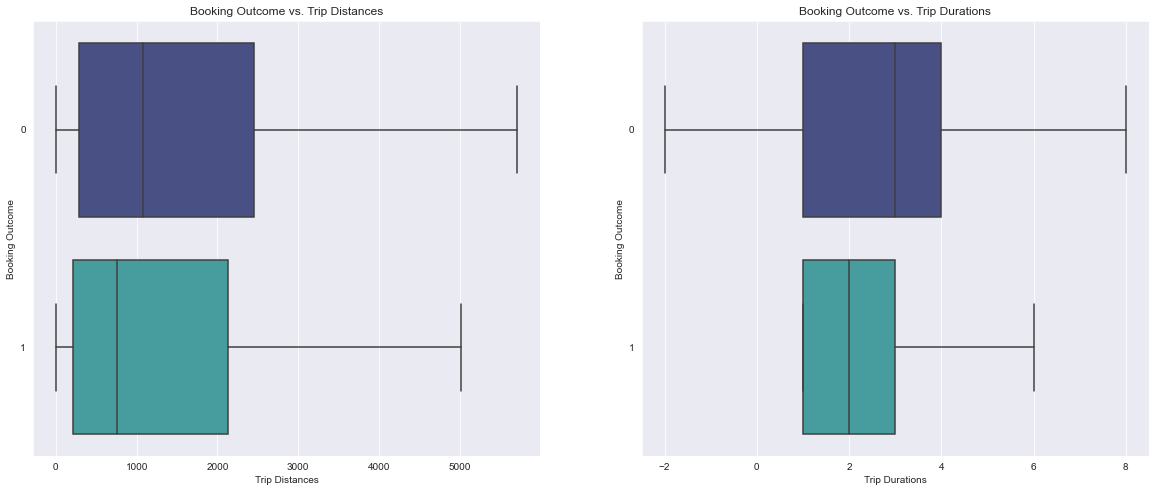

In [288]:
###########################################################################################################################################################################################

### *** View the general distribution trends between booking outcomes vs. (trip_distances + trip_durations).

# Set up the grid size and dimensions with the figure. 
fig,ax = plt.subplots(1, 2, figsize = (20,8))

# Boxplot 1: Training Booking Outcomes vs. Trip Distances. Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'trip_distances', y = 'booking_outcome', data = train_viz_df, palette = 'mako', showfliers = False, ax = ax[0]);
ax[0].set_title('Booking Outcome vs. Trip Distances');
ax[0].set_xlabel('Trip Distances');
ax[0].set_ylabel('Booking Outcome');

# Boxplot 2: Training Booking Outcomes vs. Trip Durations. Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'trip_durations', y = 'booking_outcome', data = train_viz_df, palette = 'mako', showfliers = False, ax = ax[1]);
ax[1].set_title('Booking Outcome vs. Trip Durations');
ax[1].set_xlabel('Trip Durations');
ax[1].set_ylabel('Booking Outcome');

# As shown here, you'll see that for those who book, trip distances are generally lower and is right skewed.
# We will probably want to capitalize more on the shorter distance trip offerings (i.e. by inference, they're logistically easier and less expensive).
print(f'\n\033[1mMean Trip Distance for Actual Booking Users:\033[0m {train_viz_df[train_viz_df.booking_outcome == 1].trip_distances.mean()} Miles\n')

# We also see here that trip durations are usually narrowed to shorter durations for those who do book (i.e. by inference, most people cannot afford to take off too many DTO days, etc.).
print(f'\n\033[1mMean Trip Durations for Actual Booking Users:\033[0m {train_viz_df[train_viz_df.booking_outcome == 1].trip_durations.mean()} Days\n')

###########################################################################################################################################################################################


Percentage of All Users with No Kids: 78.65427066475931%

Percentage of Actual Booking Users with No Kids: 80.9633665436999%



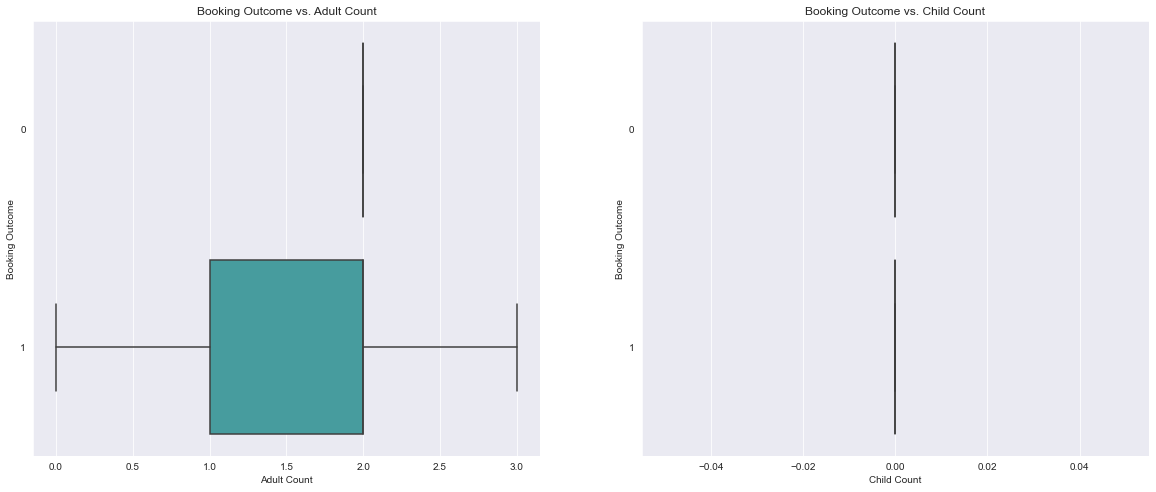

In [289]:
###########################################################################################################################################################################################

### *** View the general distribution trends between booking outcomes vs. (adult_count + child_count + total_count).

# Set up the grid size and dimensions with the figure. 
fig,ax = plt.subplots(1, 2, figsize = (20,8))

# Boxplot 1: Training Booking Outcomes vs. Adult Count. Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'adult_count', y = 'booking_outcome', data = train_viz_df, palette = 'mako', showfliers = False, ax = ax[0]);
ax[0].set_title('Booking Outcome vs. Adult Count');
ax[0].set_xlabel('Adult Count');
ax[0].set_ylabel('Booking Outcome');

# Boxplot 2: Training Booking Outcomes vs. Child Count. Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'child_count', y = 'booking_outcome', data = train_viz_df, palette = 'mako', showfliers = False, ax = ax[1]);
ax[1].set_title('Booking Outcome vs. Child Count');
ax[1].set_xlabel('Child Count');
ax[1].set_ylabel('Booking Outcome');

# Negate the total counts for now - Some of these numbers are faulty and not correct, because this cannot be 0 if adult_count and child_count are non-zero.
# Boxplot 3: Training Booking Outcomes vs. Total Count. Negate outliers for now - They distort overall trend visualizations.
#sns.boxplot(x = 'total_count', y = 'booking_outcome', data = train_viz_df, palette = 'mako', showfliers = False, ax = ax[1]);
#ax[2].set_title('Booking Outcome vs. Total Count');
#ax[2].set_xlabel('Total Count');
#ax[2].set_ylabel('Booking Outcome');

# The predominant amount of people have little to no children. 
# (train_viz_df.child_count.value_counts()[0] / len(train_viz_df)) * 100 = 78.65% of these people have no children.
print(f'\033[1m\nPercentage of All Users with No Kids:\033[0m {(train_viz_df.child_count.value_counts()[0] / len(train_viz_df)) * 100}%\n')

# If you look at only people who actually book, this is still the case and even increases.
#(train_viz_df[train_viz_df.booking_outcome == 1].child_count.value_counts()[0] / len(train_viz_df[train_viz_df.booking_outcome == 1])) * 100 = 80.96% have no children of those that book.
print(f'\033[1mPercentage of Actual Booking Users with No Kids:\033[0m {(train_viz_df[train_viz_df.booking_outcome == 1].child_count.value_counts()[0] / len(train_viz_df[train_viz_df.booking_outcome == 1])) * 100}%\n')

# This means that most of the people we'd like to observe in our target demographic have no children.
# They're also cheaper/budgeted people - They prefer lower travel distances and lower trip durations.

###########################################################################################################################################################################################

In [293]:
###########################################################################################################################################################################################

# What are the top hotel_cluster types in our first target outcome?
# Let's look at the Top 5 and boxplot them relative to trip_distances + trip_durations.
# Then, we can run the same boxplotting relative to adult_count + child_count.
top_hotel_clusters = train_viz_df.hotel_cluster.value_counts().rename_axis('hotel_cluster').reset_index(name = 'count')
top_hotel_clusters

###########################################################################################################################################################################################

,hotel_cluster,count
0,91,958877
1,48,686060
2,41,681051
3,64,598420
4,5,541257
...,...,...
95,35,122719
96,53,111246
97,88,95348
98,27,78572


In [308]:
###########################################################################################################################################################################################

# Make a barchart to see the hotel cluster distributions from 0 to 99 (all 100 of them).
#fig,ax = plt.subplots(1,1,figsize = (18,18))
#sns.barplot(x = top_hotel_clusters.hotel_cluster, y = top_hotel_clusters.count, color = 'red', ax = ax[0]);
#ax[0].set_title('Cluster Count vs. Hotel Cluster Types');
#ax[0].set_xlabel('Hotel Cluster Types');
#ax[0].set_ylabel('Cluster Count');

###########################################################################################################################################################################################

In [302]:
###########################################################################################################################################################################################

# Clearly, the Top 5 hotel_cluster types by sheer popularity are 91, 48, 41, 64, 5.
# Trim out anything else from train_viz_df that are not part of that.

# There's definitely a smarter way to do this dynamically, but in essence of time, we'll just hard code this list in.
train_cluster_viz_df = train_viz_df[(train_viz_df.hotel_cluster == 91) | (train_viz_df.hotel_cluster == 48) | (train_viz_df.hotel_cluster == 41) | (train_viz_df.hotel_cluster == 64) | (train_viz_df.hotel_cluster == 5)]
train_cluster_viz_df = train_cluster_viz_df.reset_index()
train_cluster_viz_df

###########################################################################################################################################################################################

,index,trip_distances,trip_durations,checkin_timestamp,checkout_timestamp,adult_count,child_count,total_count,hotel_cluster,booking_outcome
0,6,NaN,1.0,2014-08-01,2014-08-02,2,0,0,41,0
1,7,NaN,1.0,2014-08-01,2014-08-02,2,0,0,41,0
2,104,2105.1808,1.0,2014-09-07,2014-09-08,3,0,0,5,0
3,105,2104.9654,1.0,2014-09-07,2014-09-08,3,0,0,91,0
4,184,NaN,1.0,2014-08-27,2014-08-28,2,0,0,64,0
...,...,...,...,...,...,...,...,...,...,...
3465660,37670258,1176.5927,4.0,2013-07-02,2013-07-06,2,2,2,91,0
3465661,37670259,1181.8941,4.0,2013-07-02,2013-07-06,2,2,2,91,0
3465662,37670261,1177.7961,4.0,2013-07-02,2013-07-06,2,2,2,91,0
3465663,37670264,1181.4133,4.0,2013-07-02,2013-07-06,2,2,2,91,0


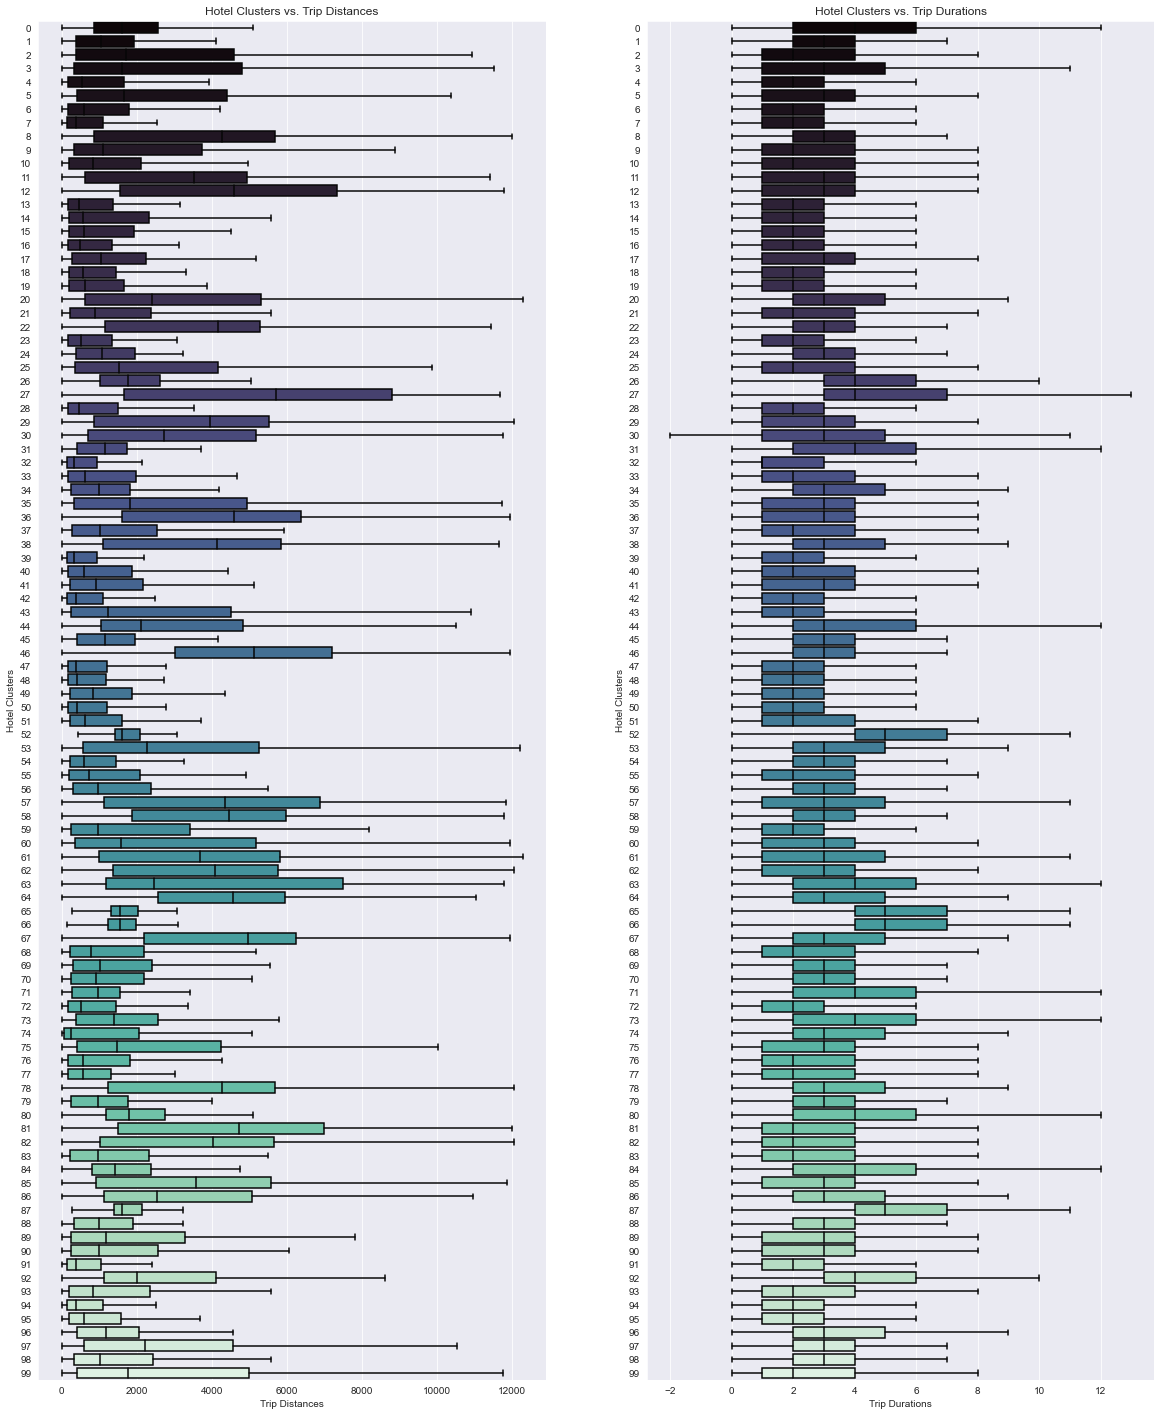

In [311]:
###########################################################################################################################################################################################

### *** View the general distribution trends between top hotel clusters vs. (trip_distances + trip_durations).

# Set up the grid size and dimensions with the figure. 
fig,ax = plt.subplots(1, 2, figsize = (20,25))

# Boxplot 1: Training Hotel Clusters vs. Trip Distances. Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'trip_distances', y = 'hotel_cluster', data = train_viz_df, palette = 'mako', showfliers = False, ax = ax[0]);
ax[0].set_title('Hotel Clusters vs. Trip Distances');
ax[0].set_xlabel('Trip Distances');
ax[0].set_ylabel('Hotel Clusters');

# Boxplot 2: Training Hotel Clusters vs. Trip Durations. Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'trip_durations', y = 'hotel_cluster', data = train_viz_df, palette = 'mako', showfliers = False, ax = ax[1]);
ax[1].set_title('Hotel Clusters vs. Trip Durations');
ax[1].set_xlabel('Trip Durations');
ax[1].set_ylabel('Hotel Clusters');

###########################################################################################################################################################################################

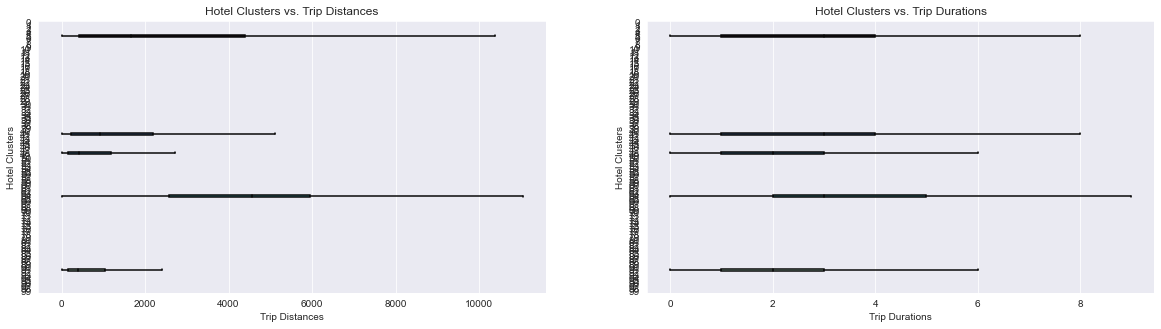

In [313]:
###########################################################################################################################################################################################

# Focus heavily on hotel_cluster = [91, 48, 41, 64, 5].
# You can also toggle this in and out by switching the data = train_viz_df into data = train_cluster_viz_df above.
# If time permits, also try to get rid of the other hotel_cluster index values.

# Set up the grid size and dimensions with the figure. 
fig,ax = plt.subplots(1, 2, figsize = (20,5))

# Boxplot 1: Training Hotel Clusters vs. Trip Distances. Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'trip_distances', y = 'hotel_cluster', data = train_cluster_viz_df, palette = 'mako', showfliers = False, ax = ax[0]);
ax[0].set_title('Hotel Clusters vs. Trip Distances');
ax[0].set_xlabel('Trip Distances');
ax[0].set_ylabel('Hotel Clusters');

# Boxplot 2: Training Hotel Clusters vs. Trip Durations. Negate outliers for now - They distort overall trend visualizations.
sns.boxplot(x = 'trip_durations', y = 'hotel_cluster', data = train_cluster_viz_df, palette = 'mako', showfliers = False, ax = ax[1]);
ax[1].set_title('Hotel Clusters vs. Trip Durations');
ax[1].set_xlabel('Trip Durations');
ax[1].set_ylabel('Hotel Clusters');

###########################################################################################################################################################################################

In [ ]:
# Boxplot 3: Training Booking Outcomes vs. Total Count (i.e. all humans in the transactions).
sns.scatterplot(x = 'total_count', y = 'booking_outcome', data = train_num_features_viz_df, palette = 'mako', ax = ax[2]);
ax[2].set_title('Booking Outcome vs. Total Count');
ax[2].set_xlabel('Total Count');
ax[2].set_ylabel('Booking Outcome');

In [ ]:
# What are the most prevalent hotel_cluster categories?

#### `Part D.` Check for NaN values in Training Set. 

In [69]:
###########################################################################################################################################################################################

# Are there NaN values in the training set?
nan_columns_train = pd.DataFrame({'column_names': train.isna().sum().index,
                                  'counts': train.isna().sum().tolist()})

# View the resulting table. This will tell you where NaN values exist in the training set.
# There are only 3 columns with NaN in the training set: 
# orig_destination_distance (origin to destination distance), srch_ci (search city), srch_co (search country).
# Notice that there are no null values in srch_destination_id, which means this should merge with the destination dataframe key later.

# orig_destination_distance is comprised of (13525001 / len(train)) * 100 = 35.9% NaN
# srch_ci is comprised of (47083 / len(train)) * 100 = 0.125% NaN
# srch_co is comprised of (47084 / len(train)) * 100 = 0.125% NaN

# Observe the NaN outcomes. 
# Consider dropping orig_destination_distance by column axis.
# Consider dropping srch_ci and srch_co by row axis. 
nan_columns_train

###########################################################################################################################################################################################

,column_names,counts
0,date_time,0
1,site_name,0
2,posa_continent,0
3,user_location_country,0
4,user_location_region,0
5,user_location_city,0
6,orig_destination_distance,13525001
7,user_id,0
8,is_mobile,0
9,is_package,0


In [94]:
###########################################################################################################################################################################################

# Generate a function to also automate the NaN percentages in columns with NaN. 
# There should be three columns in the training set. 
def get_cols_with_nas_percent_rows(df):
    res = []
    df_nas = df.isna().sum()/df.shape[0]
    for i, val in df_nas.items():
        if val > 0:
            res.append((i, val))
    return res

# Explain what this is.
print('\n\033[1mPercentage of NaN per Training Set Column (for Columns containing NaN):\033[0m\n')

# Execute this the NaN aggregating function for the training set. 
# This should match the results shown above as well. 
for feature_tuple in get_cols_with_nas_percent_rows(train):
    print(f'\nThe \033[1m{feature_tuple[0]} column\033[0m has \033[1m{np.round((feature_tuple[1]*100),3)}% NaN\033[0m.\n')

###########################################################################################################################################################################################


Percentage of NaN per Training Set Column (for Columns containing NaN):


The orig_destination_distance column has 35.904% NaN.


The srch_ci column has 0.125% NaN.


The srch_co column has 0.125% NaN.



In [96]:
###########################################################################################################################################################################################

# Generate a function to also automate the NaN percentages through the entire training set dataframe.
# This is a higher level measurement than the returned values from get_cols_with_nas_percent_rows(df).
def get_percent_cols_with_nas(df):
    cnt = 0
    for i, val in df.isna().sum().items():
        if val > 0:
            cnt += 1
    return cnt/len(df.columns)

# Explain what this is.
print('\n\033[1mPercentage of NaN in Overall Training Set Dataframe:\033[0m\n')

# Execute this the NaN aggregating function for the training set dataframe. 
training_nan_pct = get_percent_cols_with_nas(train)
print(f'\nThe \033[1mtraining set\033[0m contains \033[1m{np.round((training_nan_pct*100),3)}% NaN\033[0m.\n')

###########################################################################################################################################################################################


Percentage of NaN in Overall Training Set Dataframe:


The training set contains 12.5% NaN.



<b>`Data Exploration Notes from Karen` : </b>


12.5% is not an insignificant number of columns with NaNs, so we shouldn't drop those column.

Regarding the dropping the pts with NaNs, I'll leave that to @Austin & @Rishav to consider. 35% is a lot of rows and 12% is also not insignificant. But perhaps see if the distribution of hotel cluster would change if dropped those rows

<br>

<b>`Data Cleansing Response from Austin & Rishav` : </b><br>

We should consider dropping the high NaN column orig_destination_distance, which has approximatel 36% null values. We should also do a version where these values are also imputed by target encoding. Note, the relevance of this task will depend on the models we want to choose - For example, for trees, dropping and imputing NaNs has no vast effect on results. 

To improve expand our modeling method selections later, we will just create separate dataframe versions with orig_destination_distance dropped and another where it is imputed. We will be able to access both data structures later when training and test to figure out which formation is idea with respect to orig_destination_distance. Note that the distance magnitude probably WILL have an effect on booking and hotel clustering outcomes, which is why we should keep two versions of this dataframe just in case.


Now, we want to look at the other two columns with NaNs - srch_ci (checkin dates) and srch_co (checkout dates), respectively. These NaN percentages are extremely low (i.e. 0.125% for each), so we can just keep those columns and delete the rows containing NaN in srch_ci and srch_co. This should have negligible impact on the outcome later. Note that we can also just make a new column with values (srch_co - srch_ci) to monitor time durations of visits - If we implement this, we will want to remove srch_ci and srch_co to reduce colinearities.

#### `Part E.` Explore the Frequency Distribution of Target Variable Categories for Output Feature 'hotel_cluster'. This is a multiclass output.

In [33]:
###########################################################################################################################################################################################

# [Multiclass Classification]: Target is the 'hotel_clusters' variable.

# View the target variables types for the hotel clusters.
# Again, although these may appear numeric, these clusters are actually categorical in nature with no ordinal inclinations.

# Note that there are 100 unique hotel_cluster types, where these 37670293 sample users are distributed across. 
# For example, hotel_cluster 91 is the most prevalent, whereas hotel_cluster 74 is least prevalent.

hotel_cluster_counts = train.hotel_cluster.value_counts().rename_axis('unique_cluster_id').reset_index(name = 'cluster_count')
hotel_cluster_counts

###########################################################################################################################################################################################

,unique_cluster_id,cluster_count
0,91,1043720
1,41,772743
2,48,754033
3,64,704734
4,65,670960
...,...,...
95,35,139122
96,53,134812
97,88,107784
98,27,105040


#### `Part F.` Explore the Frequency Distribution of Target Variable Categories for Output Feature 'is_booking'. This is a binary output.

In [103]:
###########################################################################################################################################################################################

# [Binary Classification]: Target is the 'is_booking' variable.

# View the target variables types for the booking decision outcomes and exists as a binary yes (1) or no (0).
# This should be much simpler than the hotel_cluster target variable. 
# Observe the distribution of booking decision outcomes across training sample.

# There are 34,669,600 with negative outcome and 3,000,693 with positive outcome.
# This is a highly imbalanced booking decision distribution. 
# We will want to explicitily stratify how we split this for training and validation later. 
# Stratified sampling is encouraged in this use case.
# Because of this high level of imbalance, we will also want to test precision, recall, and f1-score against accuracies later.
# Accuracies alone can be a deceptive performance metric given the imbalanced outcome proportions available here.
is_booking_counts = train.is_booking.value_counts().rename_axis('unique_booking_outcome').reset_index(name = 'booking_outcome_counts')
is_booking_counts

###########################################################################################################################################################################################

,unique_booking_outcome,booking_outcome_counts
0,0,34669600
1,1,3000693


#### `Part G.` Read the Destination Data. 

In [109]:
###########################################################################################################################################################################################

# View the destination data. What are these numeric values representing?
# Look at the raw destination data descriptions (i.e. https://www.kaggle.com/c/expedia-hotel-recommendations/data)
# The documentation states that the data represents numeric values that represent hotel review and search descriptions from users. 
# This means this was originally text data that was converted (i.e. vectorized) to token distributions per unique destination.
destinations = pd.read_csv(data_folder + 'destinations' + csv_extension)

# Observe the first 5 samples of the destination data. 
destinations.head(5)

###########################################################################################################################################################################################

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [112]:
###########################################################################################################################################################################################

# There are 62,106 vectorized search descriptions that tie into 62,106 unique destination ID values per instance.
print(f'\n\033[1mDestination Set Row Count:\033[0m {destinations.shape[0]}')

# There are 149 tokens in the descriptions. Subtract 1 to remove the non-token column (i.e. Destination ID column).
print(f'\n\033[1mDestination Set Column Count:\033[0m {destinations.shape[1]-1}')

###########################################################################################################################################################################################


Destination Set Row Count: 62106

Destination Set Column Count: 149


#### `Part H.` Observe the Data Types of the Feature Selection in the Destination Set.

#### `Destination Set Description` : 

<br>

![feature_dtypes_destination](imgs/feature_dtypes_destination.png)

[<b>Kaggle Source -</b> Linked Here](https://www.kaggle.com/c/expedia-hotel-recommendations/data?select=sample_submission.csv)



#### `Part I.` Examine the Descriptive Statistics of Destination Set Features. Include Distributions and Visualizations.

In [115]:
###########################################################################################################################################################################################

# View the descriptive statistics for numeric feaures.

# Note that this is just a preliminary observation.
# Unlike in the training set, these features are numeric and are normalized count vectorized tokens.
# Although the tokens have not been shared, these are normalized token frequencies that denote hotel search descriptors.
destinations.describe()

###########################################################################################################################################################################################

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
count,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,...,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000
mean,32359.463884,-2.193903,-2.202854,-2.207391,-2.194040,-2.161497,-2.045110,-2.202433,-2.203207,-2.107808,...,-2.204092,-2.196919,-2.203262,-2.205128,-2.201925,-2.203332,-2.202989,-2.208359,-2.208269,-2.199470
std,18711.765765,0.038576,0.041065,0.040092,0.041406,0.066197,0.135803,0.038886,0.036578,0.197904,...,0.037164,0.059914,0.046520,0.039465,0.041603,0.038239,0.051552,0.038035,0.038569,0.042438
min,0.000000,-2.597617,-2.671613,-2.671613,-2.671613,-2.671613,-2.344165,-2.671613,-2.671613,-2.495544,...,-2.620769,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613
25%,16320.250000,-2.209336,-2.220192,-2.223679,-2.211437,-2.192158,-2.154267,-2.218745,-2.219086,-2.197704,...,-2.219630,-2.216147,-2.220347,-2.221893,-2.218394,-2.220500,-2.221748,-2.224618,-2.224290,-2.216428
50%,32277.500000,-2.185969,-2.193247,-2.195208,-2.188057,-2.178255,-2.088598,-2.192513,-2.192915,-2.177229,...,-2.192232,-2.190525,-2.192814,-2.194127,-2.191564,-2.192200,-2.193352,-2.196185,-2.195900,-2.190953
75%,48467.750000,-2.175309,-2.179261,-2.179990,-2.176763,-2.153317,-1.975940,-2.178976,-2.179164,-2.123598,...,-2.178093,-2.177777,-2.178996,-2.179475,-2.178335,-2.177590,-2.178927,-2.180602,-2.180380,-2.178088
max,64993.000000,-1.596004,-1.341325,-1.917826,-1.814585,-1.607558,-1.209058,-1.474441,-1.879678,-0.977219,...,-1.855317,-0.960356,-1.357408,-1.775218,-1.790435,-1.799341,-1.335962,-1.816892,-1.718778,-1.500309


In [211]:
###########################################################################################################################################################################################

# Since these are all likely normalized count vectorization of token frequencies, let's examine the general distribution.
# All terms [d1,...,dn] have been scaled to the same magnitudes.
# Find a way to compress the values so that you can visualize the overall term distributions across all "documents".
# These "documents" are unique search descriptions per destination ID.

# Grab the minimum, median, mean, standard deviation, and maximum values across all tokens and across all documents.
# These descriptors should be able to generate a basic single boxplot later to summarize token distributions for the "average" document.
descriptive_terms = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
descriptive_values = []

# For all the descriptive terms from .describe(), average out each statistical metric, then save to a list.
for item in descriptive_terms:
    descriptive_values.append(destinations.describe().loc(axis = 0)[item][1:].mean())

# For all descriptive terms from .describe() and the saved statistical metrics, zip and display.
# We can reaccess this later to view the general Gaussian trends (i.e. skewness, kurtosis, etc.) in following visualizations.
for term, value in zip(descriptive_terms, descriptive_values):
    print(f'\033[1mMean of {term} threshold of Word Tokens dn:\033[0m {value}\n')
    
# Note that we can also save each statistical metric as a vector to plot. 
# For example, take the mean frequency of all tokens and plot across to as barcharts to see mean token frequencies and which tokens occur most/least.

###########################################################################################################################################################################################

Mean of mean threshold of Word Tokens dn: -2.182806969426311

Mean of std threshold of Word Tokens dn: 0.054301887901245745

Mean of min threshold of Word Tokens dn: -2.6002872782470474

Mean of 25% threshold of Word Tokens dn: -2.2096605979037416

Mean of 50% threshold of Word Tokens dn: -2.1814807660470805

Mean of 75% threshold of Word Tokens dn: -2.157518357028507

Mean of max threshold of Word Tokens dn: -1.5899755010703758



In [116]:
###########################################################################################################################################################################################

# Insert potential visualizations here for numeric features here, if applicable.
# You can use the statistics shown above.
# Note that we only want to view numeric distributions of true continuous variables ONLY:
# orig_destination_distance, date_time, srch_ci, srch_co, srch_adults_cnt, srch_children_cnt, cnt

# Use boxplots to show the descriptive statistics. There can be 7 preliminary visualizations. 
#[INSERT CODE HERE.]

###########################################################################################################################################################################################

#### `Part J.` Check for NaN values in Destination Set. 

In [212]:
###########################################################################################################################################################################################

# Are there NaN values in the destination set?
nan_columns_destinations = pd.DataFrame({'column_names': destinations.isna().sum().index,
                                         'counts': destinations.isna().sum().tolist()})

# View the resulting table. This will tell you where NaN values exist in the training set.
# There are no NaN values in the destinations dataframe. 

# Observe any NaN outcomes. There are none.
display(nan_columns_destinations)

# However - 
# The srch_destination_id key will have to be the field that joins training and external destination sets. 
# The training and external destination sets might have mismatched instances. 
# For example, training sets can have a missing NaN in srch_destination_id.
# It can also have a srch_destination_id that exists in one, but not the either.
# Ensure we know which areas exist and do not, prior to later merging steps.
print(f'\033[1mNaN Count in Destination Dataframe:\033[0m {destinations.isna().sum().sum()}')

###########################################################################################################################################################################################

,column_names,counts
0,srch_destination_id,0
1,d1,0
2,d2,0
3,d3,0
4,d4,0
...,...,...
145,d145,0
146,d146,0
147,d147,0
148,d148,0


NaN Count in Destination Dataframe: 0


#### `Part K` : View unique destination ID values. Determine how summations of unique location identifiers can merged to the training set later.

In [68]:
###########################################################################################################################################################################################

# How many unique search Destination ID values are there?
# There are 62,106 unique Destination ID values where hotel searches were performed on. Same as the number of rows here.
# There are 37,670,293 rows in the training set that these 62,106 unique Destination ID must be spread over.
# Once again, note not all of these training set rows will have a 
destination_id_counts = destinations.srch_destination_id.value_counts().rename_axis('destination_id').reset_index(name = 'destination_id_count')
destination_id_counts

###########################################################################################################################################################################################

,destination_id,destination_id_count
0,0,1
1,42771,1
2,42743,1
3,42744,1
4,42745,1
...,...,...
62101,21858,1
62102,21859,1
62103,21860,1
62104,21861,1


<b> `Data Cleansing Note for Destination Data from Austin & Rishav:`</b> <br><br>The destinations dataframe joins to training set dataframe on destination.srch_destination_id == train.srch_destination_id. Since the destinations dataframe is based off hotel review text data (i.e. raw numeric string token aggregations are not explicitly shared), it is very likely these numbers are normalized token vectorizations. <br><br>It would be more helpful to separate this out in a different training/test set iteration and only join this data to the target variable columns in the training and test data later, while removing other features - Then, treat this as a separate text classifier for hotel_cluster and is_booking. <br><br>These 149 columns for the destination dataframe are token vectorized description of search regions that can be coupled with the target variables to also generate predictions based off user search descriptions. For this use case, SVM's are often the ideal and quickest way for NLP/text mining predictions. We can compare this to the outcome of models created on the initial features in the training set 'train'.<br>

In [218]:
# What does the location data and identifiers look like throughout the training set?
# We know that srch_destination_id is mergable to some degree if identifiers are present in both.
# Can we say for the rest? Let's check.

# View the site names present in training set. 
# They are not actual names, they've been encoded into non-descriptive categorical types renders as numbers.
# Note - These are not inherently numeric in nature, they function as an encoded site name INDEX.
print(f'\033[1mSorted Site Name (Indices) of Training Set:\033[0m\n\n{np.sort(train.site_name.unique())}\n')
print(f'\033[1mSorted User Location Country (Indices) of Training Set:\033[0m\n\n{np.sort(train.user_location_country.unique())}')


Sorted Site Name (Indices) of Training Set:

[ 2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 40 41 43 44 45 46 47 48 53]

Sorted User Location Country (Indices) of Training Set:

[  0   1   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 178 179 180 181 182
 183 184 185 186 187 188 189 

#### `Exploration Notes from Karen` :

<b>Do we have all categorical ID values for each feature?</b>

<b>Regarding missing data location indices - </b>

The site_name ID values do not incrementally go up in the train data - They are not ordinal, just nominal. Note that it's missing ID values 1, 42, and 49 (as well as a few others). Looking at posa_continent's minimum (which is 0), it is also feasible that site_name ID is also missing at id = 0. It is odd for those numbers to be explicitly skipped. It's likely that the entire dataset has pts with those missing ids, but they're not present in our train set. This implies we'll probably have to handle seeing unknown/never-before-seen feature values in the test set.

The user_location_country is also missing some ID values (like site_name), so the before mentioned problem is probably going to be an issue accross all categorical features.


#### `Part L` : Observe the joinable srch_destination_id key. Determine how we want to merge this data to training set target features later.

In [220]:
###########################################################################################################################################################################################

# Test to see if there are missing values in srch_destination_id, assuming 
srch_dest_set = set(destinations['srch_destination_id'])
srch_dest_id = 0
missing = []
while srch_dest_id <= destinations['srch_destination_id'].max():
    if srch_dest_id not in srch_dest_set:
        missing.append(srch_dest_id)
    srch_dest_id += 1

###########################################################################################################################################################################################
    
# This will do the same of storing missing values and iterates a little faster.
#missing = []
#for item in list(range(0,destinations['srch_destination_id'].max()+1)):
#    if item not in destinations['srch_destination_id']:
#        missing.append(item)

###########################################################################################################################################################################################

# Explain what this is.
print('\n\033[1mList of Missing Incremental Values in Destination Set:\033[0m\n')
display(np.array(missing))

# Execute this the NaN aggregating function for the training set dataframe. 
print(f'\nThe \033[1mdestination dataset\033[0m contains \033[1m{len(missing)} missing unique destination identifiers\033[0m.')

###########################################################################################################################################################################################


List of Missing Incremental Values in Destination Set:



array([   12,    22,   133, ..., 64972, 64984, 64985])


The destination dataset contains 2888 missing unique destination identifiers.


#### `Data Exploration Notes from Karen` :

Interesting - You would have thought that we'd have all incremental ID values for srch_destination_id in the destinations CSV. Maybe they were distinctively left out? Are there srch_destination_ids in train that don't exist in destinations? What about the other way around? Let's see how these unique ID values merge by seeing how they exist/don't exist in each unique dataset. <br><br>


In [173]:
###########################################################################################################################################################################################

train_srch_dest_ids_set = set(train['srch_destination_id'])
dest_srch_dest_ids_set = set(destinations['srch_destination_id'])

print('\033[1mCount of srch_destination_id in training set, but not in destination set:\033[0m\n')
train_minus_dest = train_srch_dest_ids_set - dest_srch_dest_ids_set
print(len(train_minus_dest))

print()

print('\033[1mCount of srch_destination_id in destination set, but not in training set:\033[0m\n')
dest_minus_train = dest_srch_dest_ids_set - train_srch_dest_ids_set
print(len(dest_minus_train))

###########################################################################################################################################################################################

Count of srch_destination_id in training set, but not in destination set:

1662

Count of srch_destination_id in destination set, but not in training set:

4313


In [225]:
# View the frequency distribution of unique srch_destination_id values in the training set.
# While destination set has only 1 ID per description text vector, training set has many.
# This means we can use the destination set row vectors repetitively to associated destination ID values in training set.
# This also means we want to later left join the destination set (right table) INTO the training set (left table).
print('\033[1mObserve the Frequency of Unique Destination ID Values in the Training Set:\033[0m\n')

# Observe the frequencies of the destination ID values to understand later table merge patterns.
srch_destination_id_train_freq = pd.DataFrame(train.srch_destination_id.value_counts().rename_axis('srch_destination_id').reset_index(name = 'count'))
srch_destination_id_train_freq


Observe the Frequency of Unique Destination ID Values in the Training Set:



,srch_destination_id,count
0,8250,1333657
1,8267,1005794
2,8791,619520
3,8268,529007
4,8253,498195
...,...,...
59450,22951,1
59451,38867,1
59452,14815,1
59453,37265,1


#### `Data Exploration Notes from Karen` :

Okay, so apparently it's not 1-1. Data is rarely clean in the real world, so while unfortunate, not unexpected. This poses the question: What do we do now for ID values in train, but not destination? Should we impute the data? Drop those rows?

#### `Data Cleansing Notes / Response from Austin & Rishav` :

Since we are interested in fitting and testing model performances on the training set features (i.e. basic categorical values + sparse numeric values) and the destination set features (i.e. normalized token frequencies) separately, the merge will be dependent on the objective. We will avoid imputing for a few reasons - 

First, these are index values (i.e. destination number "labels") with no true inherent values. If we try to impute using value of means or target encoding, we might distort which labels these instances should actually belong two. 

Second, there 4313 unique srch_destination_id in destination set that is not in the training set and 1662 unique srch_destination_id in training set that is not in the destination set. If we do a left join of destination set (right table) into the training set (left table), this implies at least 1662 examples would be lost. If we do a left join of training set (right table) into the destination set (left table), this implies at least 4313 examples would be lost. 

Our goal is to retain both the term vectors per destination ID, along with the target labels - This means we will want the first option - Merge destinations set (right) into training set (left) through a left join. This should retain all of the hotel_cluster and is_booking labels, along with all relevant term frequency vectors from destinations. This also minimizes the data loss, because if 1662 unique destination ID values are lost out of 59455 unique destination ID values available in the training set, this implies only a loss of only about 2.8%. Assuming that the likelihood of this 2.8% will contain any high frequency srch_destination_id values in training set is LOW, we can realize this to be the best option that retains the most relevant data needed to later steps.

This merge will only need to occur when we need to use the normalize token frequencies in destinations, so we would want to do the following for this:

<b>1.</b> Left join the training set into the destinations set, where destinations is the left table - Save to a merged table variable. This retains filled rows for all token frequency vector examples shown.<br><br>
<b>2.</b> Slice out all features of this structure that are not token frequency or target variable related - This includes all indices as well. <br><br>
<b>3.</b> Use this new dataframe for text mining predictions later. <br><br>

In [229]:
#train.corr()

## Colinear?

In [98]:
train.cov()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
site_name,143.222099,-5.683001,117.986045,319.838418,-3.224373e+03,6.115038e+02,1.010036e+05,-0.029045,0.268109,-1.322880,...,-0.282185,0.086050,3.843352e+03,-0.275525,-0.033632,0.292368,3.938660,175.473016,-410.920508,-7.754511
posa_continent,-5.683001,0.559563,7.796804,-4.444136,4.873691e+02,5.787439e+01,-2.925821e+03,0.004165,-0.030434,0.255899,...,0.018453,-0.010853,-1.029484e+02,0.068593,0.001970,-0.013548,-0.405066,-6.571571,19.358628,0.323117
user_location_country,117.986045,7.796804,3509.745294,683.676340,1.227846e+05,5.820678e+03,-4.765141e+05,0.073091,-0.648602,23.351339,...,1.599158,-0.005766,5.949705e+03,3.897444,0.120725,0.199507,-6.467190,314.968489,552.137316,-17.948350
user_location_region,319.838418,-4.444136,683.676340,43448.796805,4.539165e+05,4.491614e+04,-1.094564e+05,1.187854,3.430112,0.467378,...,1.883036,0.025933,5.100098e+04,4.425131,0.358478,-2.260193,15.539729,-638.119113,4798.757178,44.924612
user_location_city,-3224.373297,487.369056,122784.598459,453916.549356,2.816541e+08,4.718788e+05,-4.044520e+07,8.257479,100.607673,1652.787203,...,110.997813,-0.525241,4.009083e+05,18.373580,10.122357,-24.592675,145.915305,-8857.848759,81128.518819,403.043824
orig_destination_distance,611.503839,57.874390,5820.678191,44916.144682,4.718788e+05,4.983799e+06,1.187211e+07,-42.158777,37.257370,24.572611,...,-103.515247,-7.339466,-6.577095e+05,-189.835644,-23.140756,26.567330,1386.739273,30561.048994,-92991.371826,472.206830
user_id,101003.558237,-2925.821039,-476514.108613,-109456.355427,-4.044520e+07,1.187211e+07,1.229326e+11,-688.740880,-1803.363524,-2659.477783,...,-56.805418,196.048071,1.168669e+07,3433.904385,172.785292,-162.638975,2148.430564,187014.172810,-735104.179905,10661.341821
is_mobile,-0.029045,0.004165,0.073091,1.187854,8.257479e+00,-4.215878e+01,-6.887409e+02,0.116721,0.008003,-0.041449,...,0.005107,-0.003512,-3.055361e+01,-0.013189,-0.002845,0.002059,-0.011713,-0.493535,1.367224,0.083097
is_package,0.268109,-0.030434,-0.648602,3.430112,1.006077e+02,3.725737e+01,-1.803364e+03,0.008003,0.186951,-0.016475,...,-0.010597,-0.007761,-7.059808e+02,-0.212441,-0.008938,0.066943,0.078483,-0.944996,-3.491601,0.484259
channel,-1.322880,0.255899,23.351339,0.467378,1.652787e+03,2.457261e+01,-2.659478e+03,-0.041449,-0.016475,13.816792,...,0.017763,0.011678,7.069519e+01,0.217257,0.024595,-0.054319,-0.128495,-0.400554,9.559863,0.075993


<font color='orange'>
    why are these cov numbers > 1? 
</font>

In [96]:
# code referenced from kj2546 hw1
cor_matrix = train.cov()
upper_triang = np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool)
to_consider = cor_matrix.where(upper_triang).abs()
drop_cols = [col for col in to_consider.columns if (to_consider[col] >= .9).sum() > 0]
train_wo_colinear_fts = train.drop(columns=drop_cols)
print(drop_cols)
train_wo_colinear_fts.head()

<ipython-input-96-cbab545ee2b4>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triang = np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool)


['posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']


,date_time,site_name,srch_ci,srch_co
0,2014-08-11 07:46:59,2,2014-08-27,2014-08-31
1,2014-08-11 08:22:12,2,2014-08-29,2014-09-02
2,2014-08-11 08:24:33,2,2014-08-29,2014-09-02
3,2014-08-09 18:05:16,2,2014-11-23,2014-11-28
4,2014-08-09 18:08:18,2,2014-11-23,2014-11-28


## Cleaning
- how we handle NaNs (and explanations)
- should we remove user_id from data (and explanation)?